In [1]:
import pandas as pd
import os
import csv
import numpy as np
import glob
from csv import reader
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [2]:
import pandas as pd
import os
import numpy as np
import glob
new_df = []
path1 = ['C:\CassFlipkratScrappingProject\S1_Dataset','C:\CassFlipkratScrappingProject\S2_Dataset']

var = []
j = 0
tst1 = []
tst3 = pd.DataFrame()
for  path2 in path1:
    A = (os.listdir(path2))
    for i in A:

        j = j + 1
        #print(i)
        if i != 'README.txt':
    #tst1.append(['a','b','c','d','e','f','g','h','i'])
            cols = ['Time', 'Acceler_Front', 'Acceler_Vert', 'Acceler_later', 'Id_sensor', 'RSSI', 'Phase', 'Frequency', 'Label']
            tst1.append(pd.read_csv(os.path.join(path2,i),sep=',',names=cols))
    #print(tst1)

       #print(tst1.isnull().sum())
       #print(tst1.head(5))

A = pd.concat(tst1,ignore_index=False)
df = pd.DataFrame(A)
df.reset_index(inplace=True)
df.drop(columns=['index'],inplace=True)

In [3]:
df.tail(5)

Time  Acceler_Front  Acceler_Vert  Acceler_later  Id_sensor  RSSI  \
75123  444.00        0.90520       0.64076      -0.082102          1 -59.5   
75124  449.00        0.90520       0.64076      -0.082102          1 -59.0   
75125  451.50        0.42446       0.91636      -0.161920          1 -53.0   
75126  451.58        0.42446       0.91636      -0.161920          1 -52.0   
75127  452.25        0.58862       0.87042      -0.082102          1 -60.0   

        Phase  Frequency  Label  
75123  1.9574     922.25      2  
75124  6.2540     922.25      2  
75125  5.7156     922.25      4  
75126  5.8982     922.25      4  
75127  5.7033     925.75      4

In [4]:
df.columns

Index(['Time', 'Acceler_Front', 'Acceler_Vert', 'Acceler_later', 'Id_sensor',
       'RSSI', 'Phase', 'Frequency', 'Label'],
      dtype='object')

In [5]:
df.shape

(75128, 9)

In [6]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

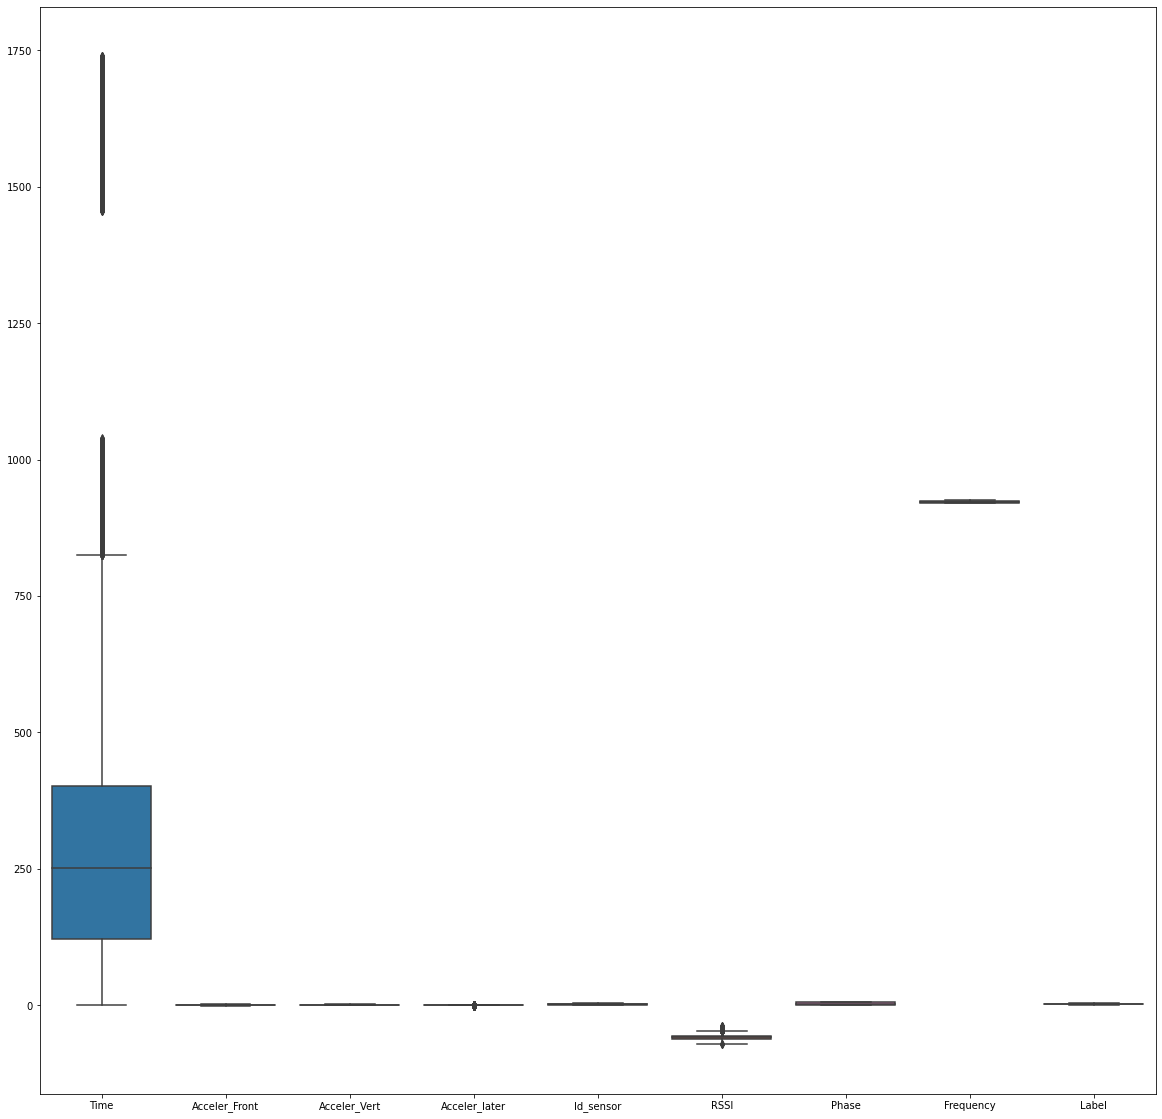

In [7]:
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = df , ax = ax)

In [8]:
data = df.copy()


In [9]:
X = data.iloc[:,:-1]
X

Time  Acceler_Front  Acceler_Vert  Acceler_later  Id_sensor  RSSI  \
0        0.00        0.27203       1.00820      -0.082102          1 -63.5   
1        0.50        0.27203       1.00820      -0.082102          1 -63.0   
2        1.50        0.44791       0.91636      -0.013684          1 -63.5   
3        1.75        0.44791       0.91636      -0.013684          1 -63.0   
4        2.50        0.34238       0.96229      -0.059296          1 -63.5   
...       ...            ...           ...            ...        ...   ...   
75123  444.00        0.90520       0.64076      -0.082102          1 -59.5   
75124  449.00        0.90520       0.64076      -0.082102          1 -59.0   
75125  451.50        0.42446       0.91636      -0.161920          1 -53.0   
75126  451.58        0.42446       0.91636      -0.161920          1 -52.0   
75127  452.25        0.58862       0.87042      -0.082102          1 -60.0   

        Phase  Frequency  
0      2.4252     924.25  
1      4.7369     921.75  
2      3.0311     923.75  
3      2.0371     921.25  
4      5.8920     920.25  
...       ...        ...  
75123  1.9574     922.25  
75124  6.2540     922.25  
75125  5.7156     922.25  
75126  5.8982     922.25  
75127  5.7033     925.75  

[75128 rows x 8 columns]

In [10]:
y = data.Label
y

0        1
1        1
2        1
3        1
4        1
        ..
75123    2
75124    2
75125    4
75126    4
75127    4
Name: Label, Length: 75128, dtype: int64

In [11]:
def vif_score(x):
    scaler = StandardScaler()
    arr = scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], columns=["FEATURE", "VIF_SCORE"])


In [12]:
vif_score(X)

FEATURE  VIF_SCORE
0           Time   1.238619
1  Acceler_Front   4.394260
2   Acceler_Vert   4.062640
3  Acceler_later   2.129413
4      Id_sensor   1.136920
5           RSSI   1.110834
6          Phase   1.008645
7      Frequency   1.046643

In [32]:
train , val_train , test , val_test  = train_test_split(X,y,test_size = .50 , random_state = 30)

In [33]:
x_train , x_test , y_train, y_test = train_test_split(train ,test,random_state = 30 , test_size = .20)

In [34]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [35]:
knn.score(x_test,y_test)

0.857313989085585

In [36]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [38]:
dtc.score(x_test,y_test)

0.9840276853454013

In [40]:
predcition_knn = knn.predict(val_train)
prediction_dtc = dtc.predict(val_train)

In [41]:
predcition_knn

array([3, 3, 3, ..., 3, 1, 1], dtype=int64)

In [42]:
prediction_dtc

array([3, 1, 3, ..., 3, 1, 1], dtype=int64)

In [43]:
input_3 = np.column_stack((predcition_knn,prediction_dtc))

In [45]:
pd.DataFrame(input_3)

0  1
0      3  3
1      3  1
2      3  3
3      3  3
4      3  3
...   .. ..
37559  3  3
37560  3  3
37561  3  3
37562  1  1
37563  1  1

[37564 rows x 2 columns]

In [47]:
output = val_test

In [46]:
new_svc = SVC()

In [48]:
new_svc.fit(input_3,val_test)

SVC()

In [50]:
prediction_output1 = knn.predict(x_test)

In [51]:
prediction_output2 = dtc.predict(x_test)

In [52]:
output_stack1 = np.column_stack ((prediction_output1,prediction_output2))

In [53]:
new_svc.predict(output_stack1)

array([1, 3, 3, ..., 3, 3, 3], dtype=int64)

In [54]:
new_svc.score(output_stack1,y_test)

0.9840276853454013